In [3]:
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [6]:
class AgentState(TypedDict):
    """State of the agent."""
    message : str

In [7]:
def greeting_msg(state: AgentState) -> AgentState:
    """Return a greeting message."""
    state['message'] =  f"Hello, {state['message']}!"
    return state

In [8]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_msg)
graph.set_entry_point("greeting")
graph.set_finish_point("greeting")

In [9]:
app = graph.compile()

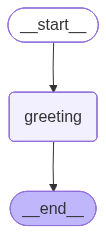

In [13]:
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
msg = app.invoke({"message": "Aloha"})
print(msg['message'])

Hello, Aloha!


### simple task

In [15]:
class AgentState(TypedDict):
    name : str

In [18]:
def compliment_msg(state: AgentState) -> AgentState:
    """Return a compliment message."""
    state['name'] = f"{state['name']} is awesome!, you're doing great!"
    return state

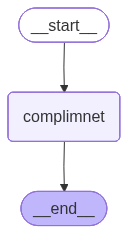

Aloha is awesome!, you're doing great!


In [19]:
graph = StateGraph(AgentState)
graph.add_node("complimnet", compliment_msg)
graph.set_entry_point("complimnet")
graph.set_finish_point("complimnet")
app = graph.compile()
from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))
msg = app.invoke({"name": "Aloha"})
print(msg['name'])

## second simple agent

In [20]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [25]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str

In [30]:
def get_sum(state: AgentState) -> AgentState:
    """Return the sum of the values."""
    result = str(sum(state['values']))
    state['result'] = f"{state['name']} the sum is {result}!"
    return state

In [31]:
graph = StateGraph(AgentState)
graph.add_node("get_sum", get_sum)
graph.set_entry_point("get_sum")
graph.set_finish_point("get_sum")
app = graph.compile()

In [32]:
app.invoke({
    "values": [1, 2, 3],
    "name": "Aloha"
})

{'values': [1, 2, 3], 'name': 'Aloha', 'result': 'Aloha the sum is 6!'}

## sequention graph

In [33]:
class AgentState(TypedDict):
    """State of the agent."""
    name : str
    age : int
    city : str
    
    final : str


In [34]:
def start_node(state: AgentState) -> AgentState:
    state['final'] = f"hi {state['name']}"
    return state

In [35]:
def second_node(state: AgentState) -> AgentState:
    state['final'] += f", you are {state['age']} years old"
    return state

In [36]:
def final_node(state: AgentState) -> AgentState:
    state['final'] += f", and you live in {state['city']}!"
    return state

In [38]:
graph = StateGraph(AgentState)

graph.add_node("start", start_node)
graph.add_node("second", second_node)
graph.add_node("final", final_node)

graph.set_entry_point("start")
graph.add_edge("start", "second")
graph.add_edge("second", "final")
graph.set_finish_point("final")

app = graph.compile()

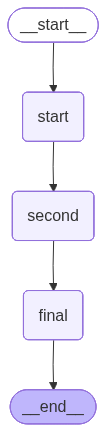

In [39]:
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
result = app.invoke({
    "name": "zkaria",
    "age": 25,
    "city": "Hawaii"
})

In [41]:
result

{'name': 'zkaria',
 'age': 25,
 'city': 'Hawaii',
 'final': 'hi zkaria, you are 25 years old, and you live in Hawaii!'}

## conditional graph

In [42]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph , START , END

In [61]:
class AgentState(TypedDict):
    first_input : float
    second_input : float
    operation: str
    result: float

In [62]:
def adder(state: AgentState) -> AgentState:
    if state['operation'] == 'add':
        state['result'] = state['first_input'] + state['second_input']
    return state

In [63]:
def substactor(state: AgentState) -> AgentState:
    if state['operation'] == 'subtract':
        state['result'] = state['first_input'] - state['second_input']
    return state

In [64]:
def multiplicator(state: AgentState) -> AgentState:
    if state['operation'] == 'multiply':
        state['result'] = state['first_input'] * state['second_input']
    return state

In [65]:
def devitionator(state: AgentState) -> AgentState:
    if state['operation'] == 'divide':
        state['result'] = state['first_input'] / state['second_input']
    return state

In [66]:
def decide_next_node(state: AgentState) -> str:
    if state['operation'] == 'add':
        return 'adder_operator'
    elif state['operation'] == 'subtract':
        return 'substactor_operator'
    elif state['operation'] == 'multiply':
        return 'multiplicator_operator'
    elif state['operation'] == 'divide':
        return 'devitionator_operator'
    else:
        return END

In [67]:
graph = StateGraph(AgentState)

graph.add_node("add_node" , adder)
graph.add_node("subtract_node" , substactor)
graph.add_node("multiply_node" , multiplicator)
graph.add_node("divide_node" , devitionator)
graph.add_node("router" , lambda state: state)

In [68]:
graph.add_edge(START , "router")
graph.add_conditional_edges(
    "router" , 
    decide_next_node,
    {
        "adder_operator" : "add_node",
        "substactor_operator" : "subtract_node",
        "multiplicator_operator" : "multiply_node",
        "devitionator_operator" : "divide_node",
    }
    
)
graph.add_edge("add_node" , END)
graph.add_edge("subtract_node" , END)
graph.add_edge("multiply_node" , END)
graph.add_edge("divide_node" , END)

app = graph.compile()

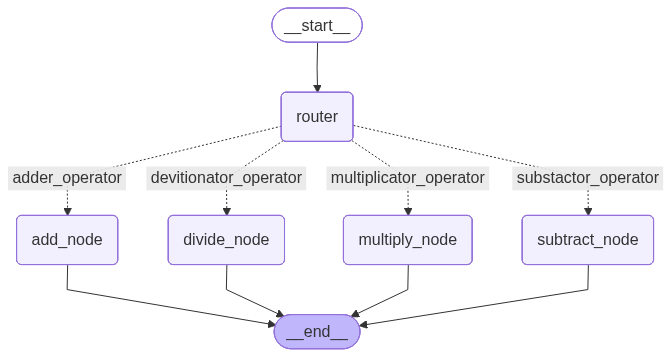

In [69]:
display(Image(app.get_graph().draw_mermaid_png()))

In [70]:
result = app.invoke({
    "first_input": 10,
    "second_input": 5,
    "operation": "add"
})

In [71]:
result

{'first_input': 10, 'second_input': 5, 'operation': 'add', 'result': 15}

## langchai google ai

In [72]:
!pip install -U langchain-google-genai

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 327.0 kB/s  0:00:048.3 kB/s eta 0:00:01:02
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [langchain-google-genai]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.9.0 which is incompatible.


In [78]:
import os
import dotenv
dotenv.load_dotenv()

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(
    model="gemma-3-27b-it",
    temperature=0.7,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [106]:
from typing import Dict, TypedDict , Union
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import StateGraph , START , END

In [107]:
class AgentState(TypedDict):
    messages : List[Union[HumanMessage, AIMessage]]

In [108]:
def process(state:AgentState) -> AgentState:
    response = model.invoke(state['messages'])
    state['messages'].append(AIMessage(content=response.content))
    return state

In [109]:
graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START , "process")
graph.add_edge("process" , END)
app = graph.compile()

In [ ]:
history = []

In [ ]:
user_input = input("User: ")
while user_input.lower() != "exit":
    history.append(HumanMessage(content=user_input))
    state = {
        "messages": history
    }
    result = app.invoke(state)
    ai_message = result['messages'][-1]
    print(f"AI: {ai_message.content}")
    history.append(ai_message)
    user_input = input("User: ")